In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


In [3]:
chembl = pd.read_csv("ChEMBL/ChEMBL3491.csv", sep=";")

In [4]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL382604,NaN,NaN,457.57,1.0,5.03,13,O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccc2...,IC50,'=',...,CHEMBL1147015,1,Scientific Literature,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,6.7
1,CHEMBL208528,NaN,NaN,455.64,1.0,6.25,4,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,Ki,'=',...,CHEMBL1147015,1,Scientific Literature,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,160.0
2,CHEMBL589135,NaN,NaN,379.29,0.0,4.75,32,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,IC50,'=',...,CHEMBL1153202,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN,1.4
3,CHEMBL1479,DANAZOL,4.0,337.46,0.0,4.22,Danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,Ki,'=',...,CHEMBL3526133,1,Scientific Literature,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,20.0
4,CHEMBL1483,ALBENDAZOLE,4.0,265.34,0.0,3.24,Albendazole,CCCSc1ccc2[nH]c(NC(=O)OC)nc2c1,Activity,'=',...,CHEMBL3526133,1,Scientific Literature,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,65.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,CHEMBL266195,ALPRENOLOL,2.0,249.35,0.0,2.15,Alprenolol,C=CCc1ccccc1OCC(O)CNC(C)C,IC50,'>',...,CHEMBL3526101,1,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0
255,CHEMBL633,AMIODARONE,4.0,645.32,2.0,6.94,Amiodarone,CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1,Inhibition,NaN,...,CHEMBL4414645,1,Scientific Literature,J Med Chem,2019.0,NaN,NaN,NaN,NaN,NaN
256,CHEMBL998,LORATADINE,4.0,382.89,0.0,4.89,Loratadine,CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,Activity,'=',...,CHEMBL3526133,1,Scientific Literature,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,11.4
257,CHEMBL74415,CANNABINOL,3.0,310.44,1.0,5.73,10b; CBN,CCCCCc1cc(O)c2c(c1)OC(C)(C)c1ccc(C)cc1-2,IC50,'=',...,CHEMBL5096151,1,Scientific Literature,J Nat Prod,2021.0,NaN,NaN,INHIBITOR,NaN,19.0


In [5]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [6]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range    1
Name: count, dtype: int64

In [7]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR    2
Name: count, dtype: int64

In [8]:
chembl["Standard Units"].value_counts()

Standard Units
nM               128
%                 87
nmol/min           9
uL/min             3
pmol/min           3
pmol.min.mg-1      1
ul.min.nmol-1      1
Name: count, dtype: int64

In [9]:
chembl["Standard Type"].value_counts()

Standard Type
IC50                 120
Activity              78
Drug metabolism       30
Inhibition             8
Ki                     7
Km                     4
CL                     4
Vmax                   4
Ratio IC50             2
Fm                     1
Compound recovery      1
Name: count, dtype: int64

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

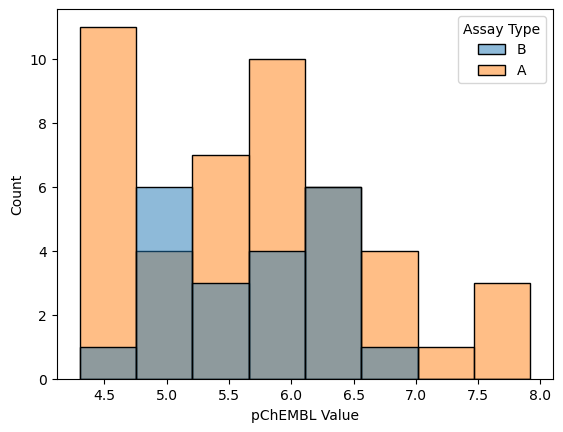

In [10]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

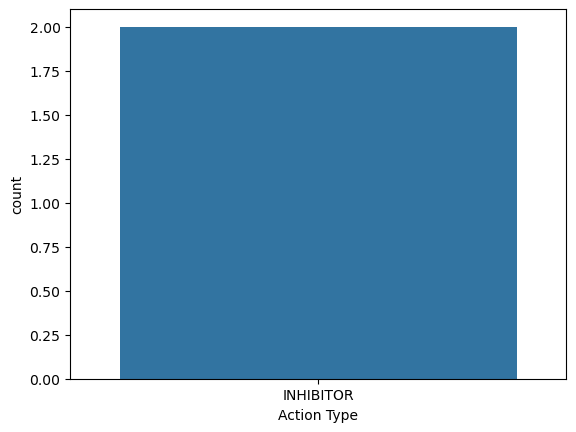

In [11]:
sns.countplot(data=chembl, x="Action Type")

In [12]:
n_mol = chembl["Molecule ChEMBL ID"].nunique()
n_mol

156

In [13]:
n_assays = chembl["Assay ChEMBL ID"].nunique()
n_assays

68

In [14]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [15]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [16]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 259/259 [00:01<00:00, 179.18it/s]


In [17]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [18]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 259/259 [00:00<00:00, 3603.37it/s]


In [19]:
chembl.INCHIKEY.nunique()

156

In [20]:
chembl.dropna(subset="INCHIKEY", inplace=True)

# select higher quality data

See here for more detail 

https://greglandrum.github.io/rdkit-blog/posts/2023-06-12-overlapping-ic50-assays1.html


## What we will do 

* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with more then N molecules (20, 10?)
* Select compounds that appear in more than L of these assays (2, 3 , 5)?

In [21]:
better_assay = chembl[
    (chembl['Standard Type'] == 'IC50') |
    (chembl['Standard Type'] == 'AC50') |
    (chembl['Standard Type'] == 'pIC50') |
    (chembl['Standard Type'] == 'XC50') |
    (chembl['Standard Type'] == 'EC50') | 
    (chembl['Standard Type'] == 'Ki') |
    (chembl['Standard Type'] == 'Potency')
]

In [22]:
better_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
0,CHEMBL382604,NaN,NaN,457.57,1.0,5.03,13,O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccc2...,IC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,6.7,O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccc2...,GTVHXLDACMVUIE-UHFFFAOYSA-N
1,CHEMBL208528,NaN,NaN,455.64,1.0,6.25,4,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,Ki,'=',...,Scientific Literature,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,160.0,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N
2,CHEMBL589135,NaN,NaN,379.29,0.0,4.75,32,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,IC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN,1.4,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N
3,CHEMBL1479,DANAZOL,4.0,337.46,0.0,4.22,Danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,Ki,'=',...,Scientific Literature,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,20.0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,POZRVZJJTULAOH-LHZXLZLDSA-N
6,CHEMBL1479,DANAZOL,4.0,337.46,0.0,4.22,Danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,IC50,'<',...,Scientific Literature,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,0.1,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,POZRVZJJTULAOH-LHZXLZLDSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,CHEMBL16073,PHENACETIN,4.0,179.22,0.0,2.04,Phenacetin,CCOc1ccc(NC(C)=O)cc1,IC50,'>',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N
251,CHEMBL1008,BEPRIDIL,4.0,366.55,0.0,4.83,Bepridil,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,IC50,'=',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,11.5,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,UIEATEWHFDRYRU-UHFFFAOYSA-N
253,CHEMBL1510,ELETRIPTAN,4.0,382.53,0.0,3.82,Eletriptan,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,IC50,'>',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,PWVXXGRKLHYWKM-LJQANCHMSA-N
254,CHEMBL266195,ALPRENOLOL,2.0,249.35,0.0,2.15,Alprenolol,C=CCc1ccccc1OCC(O)CNC(C)C,IC50,'>',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,C=CCc1ccccc1OCC(O)CNC(C)C,PAZJSJFMUHDSTF-UHFFFAOYSA-N


In [23]:
better_units = better_assay[better_assay['Standard Units'] == "nM"]
better_units

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
0,CHEMBL382604,NaN,NaN,457.57,1.0,5.03,13,O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccc2...,IC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,6.7,O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccc2...,GTVHXLDACMVUIE-UHFFFAOYSA-N
1,CHEMBL208528,NaN,NaN,455.64,1.0,6.25,4,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,Ki,'=',...,Scientific Literature,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,160.0,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N
2,CHEMBL589135,NaN,NaN,379.29,0.0,4.75,32,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,IC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN,1.4,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N
3,CHEMBL1479,DANAZOL,4.0,337.46,0.0,4.22,Danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,Ki,'=',...,Scientific Literature,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,20.0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,POZRVZJJTULAOH-LHZXLZLDSA-N
6,CHEMBL1479,DANAZOL,4.0,337.46,0.0,4.22,Danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,IC50,'<',...,Scientific Literature,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,0.1,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,POZRVZJJTULAOH-LHZXLZLDSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,CHEMBL16073,PHENACETIN,4.0,179.22,0.0,2.04,Phenacetin,CCOc1ccc(NC(C)=O)cc1,IC50,'>',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N
251,CHEMBL1008,BEPRIDIL,4.0,366.55,0.0,4.83,Bepridil,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,IC50,'=',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,11.5,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,UIEATEWHFDRYRU-UHFFFAOYSA-N
253,CHEMBL1510,ELETRIPTAN,4.0,382.53,0.0,3.82,Eletriptan,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,IC50,'>',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,PWVXXGRKLHYWKM-LJQANCHMSA-N
254,CHEMBL266195,ALPRENOLOL,2.0,249.35,0.0,2.15,Alprenolol,C=CCc1ccccc1OCC(O)CNC(C)C,IC50,'>',...,Scientific Literature,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,C=CCc1ccccc1OCC(O)CNC(C)C,PAZJSJFMUHDSTF-UHFFFAOYSA-N


In [24]:
num_compounds_per_assay = better_units.groupby("Assay ChEMBL ID")["Molecule ChEMBL ID"].nunique()

In [25]:
num_compounds_per_assay

Assay ChEMBL ID
CHEMBL1058985     2
CHEMBL1074710     3
CHEMBL1119168     5
CHEMBL2072825     4
CHEMBL3529113     4
CHEMBL3529115     1
CHEMBL3529116     1
CHEMBL3529761     1
CHEMBL3531438     2
CHEMBL3531439     2
CHEMBL3531440     1
CHEMBL3534693     1
CHEMBL3535114     4
CHEMBL3535115     1
CHEMBL3535116     1
CHEMBL3541092     2
CHEMBL3541093    69
CHEMBL3888578     1
CHEMBL4181975     1
CHEMBL5096666     1
CHEMBL5115436     1
CHEMBL5367493     1
CHEMBL869679     14
Name: Molecule ChEMBL ID, dtype: int64

In [26]:
num_compounds_per_assay_df = pd.DataFrame(num_compounds_per_assay)
num_compounds_per_assay_df.rename(columns={"Molecule ChEMBL ID": "molecule_count"}, inplace=True)
num_compounds_per_assay_df

,molecule_count
Assay ChEMBL ID,
CHEMBL1058985,2
CHEMBL1074710,3
CHEMBL1119168,5
CHEMBL2072825,4
CHEMBL3529113,4
CHEMBL3529115,1
CHEMBL3529116,1
CHEMBL3529761,1
CHEMBL3531438,2


In [27]:
combined = better_units.join(num_compounds_per_assay_df, on="Assay ChEMBL ID")
combined["molecule_count"].unique()

array([14,  3,  1,  4,  2,  5, 69])

In [28]:
N = 1 # assays must have more than N compounds in them 

In [29]:
more_than_N_compounds = combined[combined["molecule_count"] > N]  

In [30]:
more_than_N_compounds

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count
0,CHEMBL382604,NaN,NaN,457.57,1.0,5.03,13,O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccc2...,IC50,'=',...,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,6.7,O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccc2...,GTVHXLDACMVUIE-UHFFFAOYSA-N,14
1,CHEMBL208528,NaN,NaN,455.64,1.0,6.25,4,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,Ki,'=',...,Bioorg Med Chem Lett,2006.0,CHEMBL3308860,NaN,NaN,NaN,160.0,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,14
2,CHEMBL589135,NaN,NaN,379.29,0.0,4.75,32,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,IC50,'=',...,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN,1.4,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,3
6,CHEMBL1479,DANAZOL,4.0,337.46,0.0,4.22,Danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,IC50,'<',...,Drug Metab Dispos,2012.0,NaN,NaN,NaN,NaN,0.1,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,POZRVZJJTULAOH-LHZXLZLDSA-N,4
8,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,Ki,'=',...,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,0.1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,CHEMBL26,SULPIRIDE,4.0,341.43,0.0,0.56,Sulpiride,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC,IC50,'>',...,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC,BGRJTUBHPOOWDU-UHFFFAOYSA-N,69
250,CHEMBL16073,PHENACETIN,4.0,179.22,0.0,2.04,Phenacetin,CCOc1ccc(NC(C)=O)cc1,IC50,'>',...,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,69
251,CHEMBL1008,BEPRIDIL,4.0,366.55,0.0,4.83,Bepridil,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,IC50,'=',...,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,11.5,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,UIEATEWHFDRYRU-UHFFFAOYSA-N,69
253,CHEMBL1510,ELETRIPTAN,4.0,382.53,0.0,3.82,Eletriptan,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,IC50,'>',...,Drug Metab Dispos,2013.0,NaN,NaN,NaN,NaN,50.0,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,PWVXXGRKLHYWKM-LJQANCHMSA-N,69


In [31]:
more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)

/tmp/ipykernel_15607/3449044069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)


<Axes: xlabel='pChEMBL Value', ylabel='Count'>

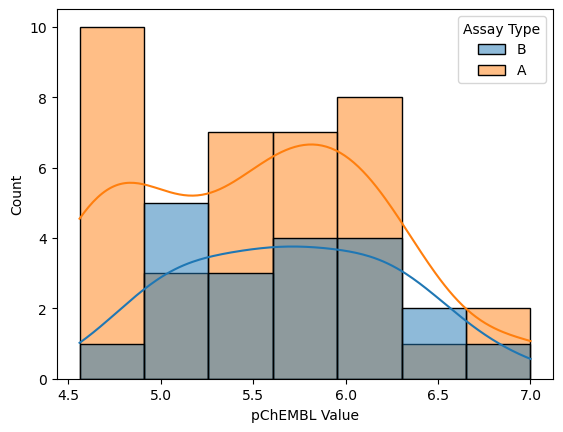

In [32]:
sns.histplot(data=more_than_N_compounds, x="pChEMBL Value", hue="Assay Type", kde=True)

<Axes: xlabel='Molecular Weight', ylabel='Count'>

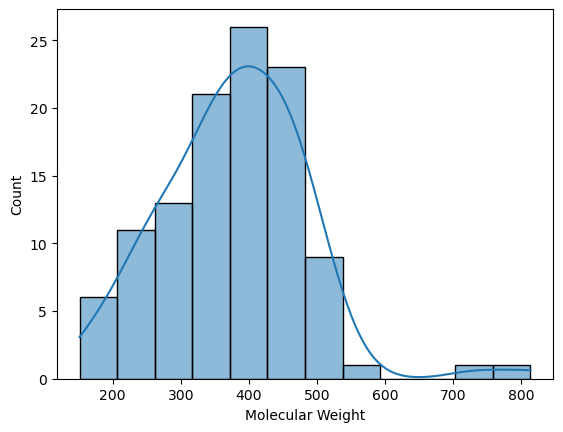

In [33]:
sns.histplot(data=more_than_N_compounds, x="Molecular Weight",  kde=True)

In [34]:
assays = more_than_N_compounds["Assay ChEMBL ID"].nunique()

In [35]:
assays

11

In [36]:
more_than_N_compounds["Molecule ChEMBL ID"].nunique()

95

In [37]:
num_assays_per_compound_df = more_than_N_compounds.groupby(["INCHIKEY"])["Assay ChEMBL ID"].size().reset_index(name="assay_count")
num_assays_per_compound_df = num_assays_per_compound_df.set_index("INCHIKEY")
num_assays_per_compound_df

,assay_count
INCHIKEY,
AOVFGEQZHDTSQA-UHFFFAOYSA-N,1
AQHHHDLHHXJYJD-UHFFFAOYSA-N,1
AQIXAKUUQRKLND-UHFFFAOYSA-N,1
ASQUTXZYOFTTDB-UHFFFAOYSA-N,1
BCGWQEUPMDMJNV-UHFFFAOYSA-N,1
...,...
YVUQSNJEYSNKRX-UHFFFAOYSA-N,2
ZPEIMTDSQAKGNT-UHFFFAOYSA-N,1
ZZUFCTLCJUWOSV-UHFFFAOYSA-N,1


<Axes: xlabel='assay_count', ylabel='count'>

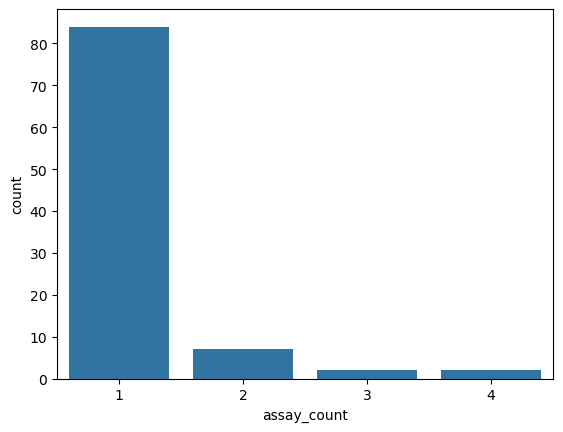

In [38]:
sns.countplot(data=num_assays_per_compound_df, x="assay_count")

In [39]:
combined_2 = more_than_N_compounds.join(num_assays_per_compound_df, on="INCHIKEY")


In [40]:
combined_2.sort_values("assay_count", ascending=False, inplace=True)
combined_2["assay_count"] = combined_2["assay_count"].astype(int)

# Aggregate activity

In [41]:
compound_grouped_mean = combined_2.groupby("INCHIKEY")["pChEMBL Value"].mean()
compound_grouped_mean.reset_index()

,INCHIKEY,pChEMBL Value
0,AOVFGEQZHDTSQA-UHFFFAOYSA-N,5.89
1,AQHHHDLHHXJYJD-UHFFFAOYSA-N,NaN
2,AQIXAKUUQRKLND-UHFFFAOYSA-N,NaN
3,ASQUTXZYOFTTDB-UHFFFAOYSA-N,6.16
4,BCGWQEUPMDMJNV-UHFFFAOYSA-N,NaN
...,...,...
90,YVUQSNJEYSNKRX-UHFFFAOYSA-N,NaN
91,ZPEIMTDSQAKGNT-UHFFFAOYSA-N,4.61
92,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,NaN
93,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,NaN


<Axes: xlabel='pChEMBL mean', ylabel='Count'>

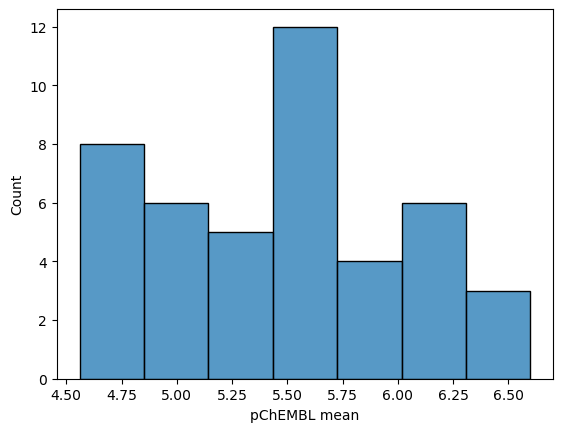

In [42]:
sns.histplot(data=compound_grouped_mean.reset_index(name="pChEMBL mean"),x="pChEMBL mean")

In [43]:
# join 
cgm = compound_grouped_mean.reset_index(name="pChEMBL mean")
cgm = cgm.set_index("INCHIKEY")
combined_3 = combined_2.join(cgm, on="INCHIKEY")


In [44]:
compound_grouped_std = combined_2.groupby("INCHIKEY")["pChEMBL Value"].std()
compound_grouped_std.reset_index()

,INCHIKEY,pChEMBL Value
0,AOVFGEQZHDTSQA-UHFFFAOYSA-N,NaN
1,AQHHHDLHHXJYJD-UHFFFAOYSA-N,NaN
2,AQIXAKUUQRKLND-UHFFFAOYSA-N,NaN
3,ASQUTXZYOFTTDB-UHFFFAOYSA-N,NaN
4,BCGWQEUPMDMJNV-UHFFFAOYSA-N,NaN
...,...,...
90,YVUQSNJEYSNKRX-UHFFFAOYSA-N,NaN
91,ZPEIMTDSQAKGNT-UHFFFAOYSA-N,NaN
92,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,NaN
93,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,NaN


<Axes: xlabel='pChEMBL stdev', ylabel='Count'>

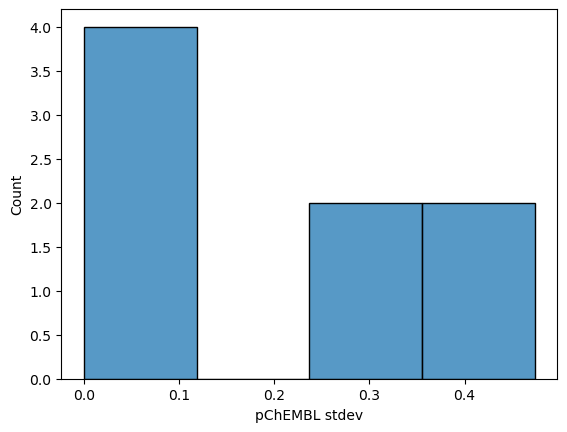

In [45]:
sns.histplot(data=compound_grouped_std.reset_index(name="pChEMBL stdev"),x="pChEMBL stdev")

In [46]:
cgstd = compound_grouped_std.reset_index(name="pChEMBL std")
cgstd = cgstd.set_index("INCHIKEY")
combined_4 =  combined_3.join(cgstd, on="INCHIKEY")

In [47]:
combined_4

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
8,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,Ki,'=',...,NaN,NaN,NaN,0.10,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,2,4,6.2925,0.473806
223,CHEMBL1017,TELMISARTAN,4.0,514.63,2.0,7.26,Telmisartan,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,IC50,'=',...,NaN,NaN,NaN,0.54,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,2,4,6.4800,0.350523
236,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,IC50,'=',...,NaN,NaN,NaN,0.76,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,2,4,6.2925,0.473806
237,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,IC50,'=',...,NaN,NaN,NaN,0.95,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,2,4,6.2925,0.473806
205,CHEMBL1017,TELMISARTAN,4.0,514.63,2.0,7.26,SID144205005,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,IC50,'=',...,NaN,NaN,NaN,0.42,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,69,4,6.4800,0.350523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,CHEMBL26,SULPIRIDE,4.0,341.43,0.0,0.56,Sulpiride,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC,IC50,'>',...,NaN,NaN,NaN,50.00,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC,BGRJTUBHPOOWDU-UHFFFAOYSA-N,69,1,NaN,NaN
250,CHEMBL16073,PHENACETIN,4.0,179.22,0.0,2.04,Phenacetin,CCOc1ccc(NC(C)=O)cc1,IC50,'>',...,NaN,NaN,NaN,50.00,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,69,1,NaN,NaN
251,CHEMBL1008,BEPRIDIL,4.0,366.55,0.0,4.83,Bepridil,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,IC50,'=',...,NaN,NaN,NaN,11.50,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,UIEATEWHFDRYRU-UHFFFAOYSA-N,69,1,4.9400,NaN
253,CHEMBL1510,ELETRIPTAN,4.0,382.53,0.0,3.82,Eletriptan,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,IC50,'>',...,NaN,NaN,NaN,50.00,CN1CCC[C@@H]1Cc1c[nH]c2ccc(CCS(=O)(=O)c3ccccc3...,PWVXXGRKLHYWKM-LJQANCHMSA-N,69,1,NaN,NaN


# Calibration of thresholds for activity and stdev?

## variablitiy

We could subselect for inter-assay variability, but we should probably do a more in depth study into this. 

We would need to select ASSAYs that are outliers and drop them rather than dropping compounds most likely. 

Lets leave it for now. 

## activity

Lets take compounds with pChEMBL >= 5.0 (XC50 = 10 um)


In [48]:
pchembl_thresh = 3.0 
active = combined_4[combined_4["pChEMBL mean"] >= pchembl_thresh]

In [68]:
active

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
8,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,Ki,'=',...,NaN,NaN,NaN,0.10,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,2,4,6.292500,0.473806
223,CHEMBL1017,TELMISARTAN,4.0,514.63,2.0,7.26,Telmisartan,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,IC50,'=',...,NaN,NaN,NaN,0.54,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,2,4,6.480000,0.350523
236,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,IC50,'=',...,NaN,NaN,NaN,0.76,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,2,4,6.292500,0.473806
237,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,IC50,'=',...,NaN,NaN,NaN,0.95,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,2,4,6.292500,0.473806
205,CHEMBL1017,TELMISARTAN,4.0,514.63,2.0,7.26,SID144205005,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,IC50,'=',...,NaN,NaN,NaN,0.42,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,69,4,6.480000,0.350523
134,CHEMBL1017,TELMISARTAN,4.0,514.63,2.0,7.26,Telmisartan,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,IC50,'=',...,NaN,NaN,NaN,0.54,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,2,4,6.480000,0.350523
135,CHEMBL30008,FLUNARIZINE,4.0,404.50,1.0,5.39,Flunarizine,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,IC50,'=',...,NaN,NaN,NaN,0.94,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,69,4,6.292500,0.473806
120,CHEMBL1017,TELMISARTAN,4.0,514.63,2.0,7.26,Telmisartan,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,Ki,'=',...,NaN,NaN,NaN,0.10,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,2,4,6.480000,0.350523
128,CHEMBL17157,TERFENADINE,4.0,471.69,1.0,6.45,Terfenadine,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,IC50,'=',...,NaN,NaN,NaN,1.83,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,4,3,5.593333,0.448367
29,CHEMBL589136,NaN,NaN,381.26,0.0,3.54,33,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,IC50,'=',...,NaN,NaN,NaN,20.00,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,3,3,4.700000,0.000000


In [49]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "pChEMBL mean", "pChEMBL std", "Molecule Name", "assay_count", "Action Type"]

In [50]:
clean_active = active[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values(["common_name", "action_type"], ascending=[False, False]) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")
clean_deduped = clean_deduped.sort_values("appears_in_N_ChEMBL_assays", ascending=False)


/tmp/ipykernel_15607/1579042175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [51]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type
8,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.2925,0.473806,FLUNARIZINE,4,NaN
223,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.4800,0.350523,TELMISARTAN,4,NaN
236,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.2925,0.473806,FLUNARIZINE,4,NaN
237,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.2925,0.473806,FLUNARIZINE,4,NaN
205,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.4800,0.350523,TELMISARTAN,4,NaN


In [52]:
clean_deduped["action_type"].value_counts()

Series([], Name: count, dtype: int64)

In [53]:
clean_deduped["action_type"] = clean_deduped["action_type"].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [54]:
clean_deduped["action_type"].value_counts()

Series([], Name: count, dtype: int64)

In [55]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

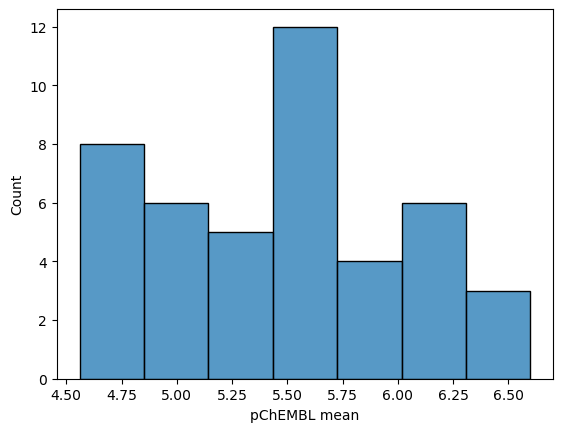

In [56]:
sns.histplot(data=clean_deduped, x="pChEMBL mean")

In [57]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)

# Subselect by number of assay appearances

In [58]:
L = 1 # compounds must appear in L or more assays

In [59]:


more_than_eq_L_assay = clean_deduped[clean_deduped["appears_in_N_ChEMBL_assays"] >= L]
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
223,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True
8,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True
29,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True
128,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True
177,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True
1,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,NaN,ChEMBL_curated,True
86,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,NaN,ChEMBL_curated,True
10,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,NaN,ChEMBL_curated,True
100,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,NaN,ChEMBL_curated,True
55,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,NaN,ChEMBL_curated,True


In [60]:
more_than_eq_L_assay.INCHIKEY.nunique()

44

<Axes: xlabel='appears_in_N_ChEMBL_assays', ylabel='count'>

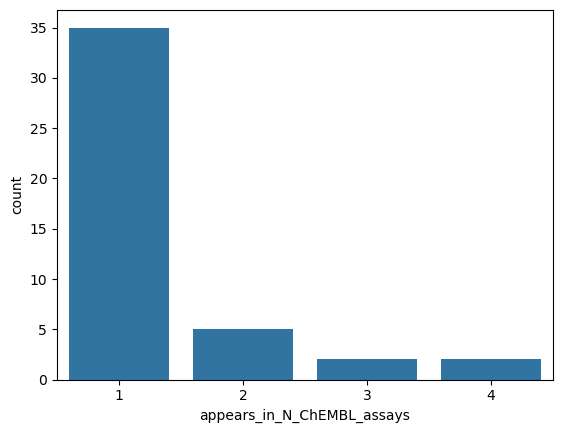

In [61]:
sns.countplot(data=more_than_eq_L_assay, x="appears_in_N_ChEMBL_assays")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

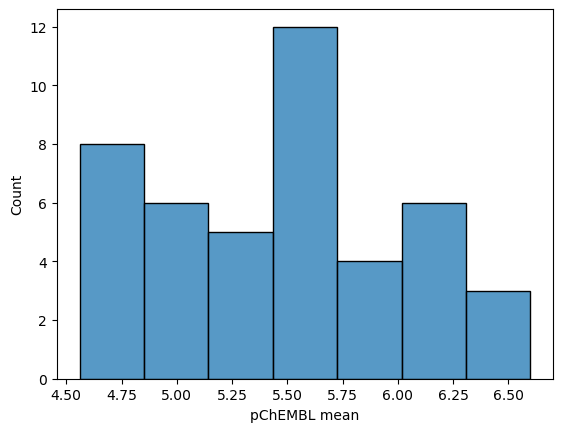

In [62]:
sns.histplot(data=more_than_eq_L_assay, x="pChEMBL mean")

In [63]:
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
223,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True
8,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True
29,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True
128,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True
177,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True
1,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,NaN,ChEMBL_curated,True
86,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,NaN,ChEMBL_curated,True
10,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,NaN,ChEMBL_curated,True
100,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,NaN,ChEMBL_curated,True
55,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,NaN,ChEMBL_curated,True


In [64]:
more_than_eq_L_assay["common_name"].value_counts()

common_name
TELMISARTAN       1
FLUNARIZINE       1
TERFENADINE       1
MICONAZOLE        1
TERFENADONE       1
VERAPAMIL         1
TRIAMCINOLONE     1
NICARDIPINE       1
NIFEDIPINE        1
NIMODIPINE        1
NORFLOXACIN       1
PERPHENAZINE      1
SERTRALINE        1
TICLOPIDINE       1
METOPROLOL        1
CEFTRIAXONE       1
CHLORPROMAZINE    1
CLOZAPINE         1
HALOPERIDOL       1
MIBEFRADIL        1
AMODIAQUINE       1
BEPRIDIL          1
BENZBROMARONE     1
Name: count, dtype: int64

In [65]:
more_than_eq_L_assay.to_csv("processed/chembl_active_selected.csv", index=False)

In [66]:
more_than_eq_L_assay.action_type.value_counts()

Series([], Name: count, dtype: int64)

In [67]:
more_than_eq_L_assay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 223 to 116
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CANONICAL_SMILES            44 non-null     object 
 1   INCHIKEY                    44 non-null     object 
 2   pChEMBL mean                44 non-null     float64
 3   pChEMBL std                 8 non-null      float64
 4   common_name                 23 non-null     object 
 5   appears_in_N_ChEMBL_assays  44 non-null     int64  
 6   action_type                 0 non-null      float64
 7   dataset                     44 non-null     object 
 8   active                      44 non-null     bool   
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 3.1+ KB
